In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression:

Let's make a toy dataset: Students admitted to New College.

We will just simulate the classes (accepted and rejected as) two gaussian distributions over one feature: "SAT Score"

In [4]:
np.random.seed(5)
n_points = 10000
clip = lambda x : np.minimum(1600, np.maximum(400, x))

x_rejected = clip(np.random.normal(1257-100,100,n_points))
x_accepted = clip(np.random.normal(1257+100,100,n_points))
X = np.concatenate([x_rejected, x_accepted])
y = np.concatenate([np.zeros(n_points), np.ones(n_points)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

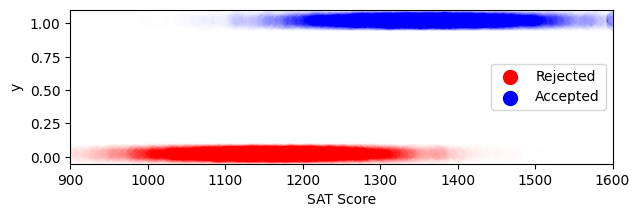

In [5]:
plt.figure(figsize=[7,2])
plt.scatter(x_rejected, 0+.05*np.random.random(x_rejected.shape), # this was added just for visualization
            s=100, alpha=.002, color='r', label='Rejected')
plt.scatter(x_accepted, 1+.05*np.random.random(x_rejected.shape), # this was added just for visualization
            s=100, alpha=.002, color='b', label='Accepted')

plt.xlim(900,1600)
plt.xlabel('SAT Score')
plt.ylabel('y')
leg = plt.legend()
for lh in leg.legendHandles:
    lh.set_alpha(1)
plt.show()

Lets try to model this with linear regression:

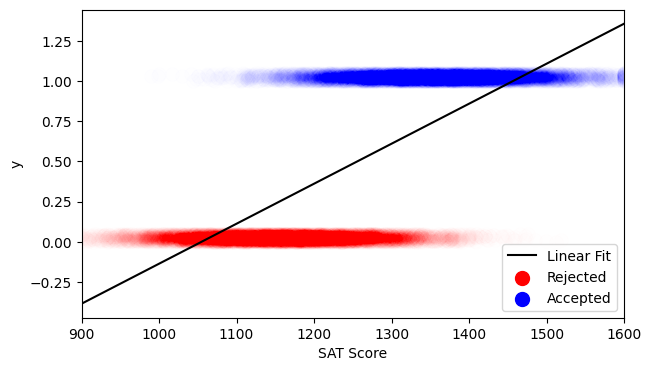

In [235]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

x_grid = np.linspace(900, 1600)
y_pred = model.predict(x_grid.reshape((-1,1)))

plt.figure(figsize=[7,4])
plt.plot(x_grid, y_pred, label='Linear Fit', color='k')


# Plot data
plt.scatter(x_rejected, 0+.05*np.random.random(x_rejected.shape), # this was added just for visualization
            s=100, alpha=.002, color='r', label='Rejected')
plt.scatter(x_accepted, 1+.05*np.random.random(x_rejected.shape), # this was added just for visualization
            s=100, alpha=.002, color='b', label='Accepted')

plt.xlim(900, 1600)
plt.xlabel('SAT Score')
plt.ylabel('y')
leg = plt.legend()
for lh in leg.legendHandles:
    lh.set_alpha(1)
plt.show()


This is nonsense! The labels are not in the right range ($\mathbb R$ instead of $[0,1]$), and it seems ad hoc and unprincipled!

New Idea: Lets look at a histogram of the data

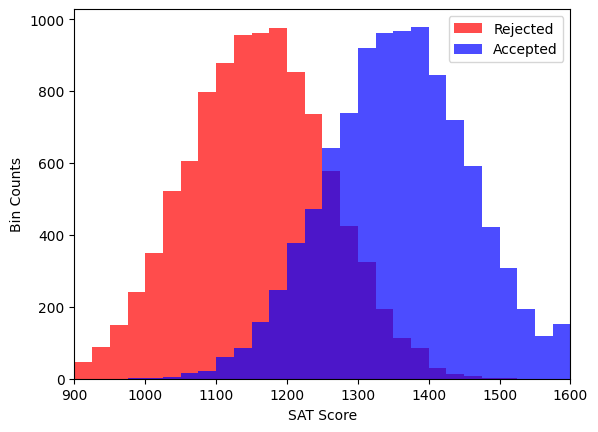

In [7]:
counts_rejected, bins = np.histogram(x_rejected, np.linspace(900,1600,29))
counts_accepted, bins = np.histogram(x_accepted, np.linspace(900,1600,29))
bin_centers = bins[:-1] + np.diff(bins)[0]/2

plt.hist(x_rejected, bins=np.linspace(900,1600,29), histtype='stepfilled', alpha=.7, color='r', label='Rejected')
plt.hist(x_accepted, bins=np.linspace(900,1600,29), histtype='stepfilled', alpha=.7, color='b', label='Accepted')
plt.xlim(900,1600)
plt.xlabel('SAT Score')
plt.ylabel('Bin Counts')
plt.legend()
plt.show()

In [240]:
fractions = counts_accepted/(counts_rejected+counts_accepted)

for bin_lower, bin_upper, frac, reject, accept in zip(bins[:-1], bins[1:], fractions, counts_rejected, counts_accepted):
    print(f'Score in [{int(bin_lower): >4}-{int(bin_upper): >4}] -- ({accept: >3} Accepted : {reject: >3} Rejected) -- Probability = {frac:.3f} -- Odds {accept/reject:.3f}')

Score in [ 900- 925] -- (  0 Accepted :  46 Rejected) -- Probability = 0.000 -- Odds 0.000
Score in [ 925- 950] -- (  0 Accepted :  89 Rejected) -- Probability = 0.000 -- Odds 0.000
Score in [ 950- 975] -- (  0 Accepted : 150 Rejected) -- Probability = 0.000 -- Odds 0.000
Score in [ 975-1000] -- (  3 Accepted : 242 Rejected) -- Probability = 0.012 -- Odds 0.012
Score in [1000-1025] -- (  1 Accepted : 349 Rejected) -- Probability = 0.003 -- Odds 0.003
Score in [1025-1050] -- (  4 Accepted : 521 Rejected) -- Probability = 0.008 -- Odds 0.008
Score in [1050-1075] -- ( 15 Accepted : 606 Rejected) -- Probability = 0.024 -- Odds 0.025
Score in [1075-1100] -- ( 21 Accepted : 798 Rejected) -- Probability = 0.026 -- Odds 0.026
Score in [1100-1125] -- ( 60 Accepted : 878 Rejected) -- Probability = 0.064 -- Odds 0.068
Score in [1125-1150] -- ( 85 Accepted : 956 Rejected) -- Probability = 0.082 -- Odds 0.089
Score in [1150-1175] -- (157 Accepted : 962 Rejected) -- Probability = 0.140 -- Odds 0.163

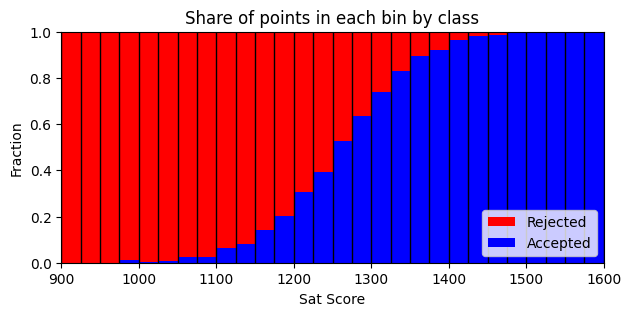

In [274]:
plt.figure(figsize=[7,3])
plt.bar(bin_centers, counts_rejected/(counts_rejected+counts_accepted), bottom=counts_accepted/(counts_rejected+counts_accepted), color='r', width=25, label='Rejected')
plt.bar(bin_centers, counts_accepted/(counts_rejected+counts_accepted), color='b', width=25, label='Accepted')
plt.vlines(bins, 0, 1, color='k', lw=1)
plt.xlim(900,1600)
plt.xlabel('Sat Score')
plt.ylabel('Fraction')
plt.title('Share of points in each bin by class')
plt.legend(loc='lower right')
plt.show()

### Compute the odds of being accepted

$$\text{Odds} = \frac{p}{1-p}$$

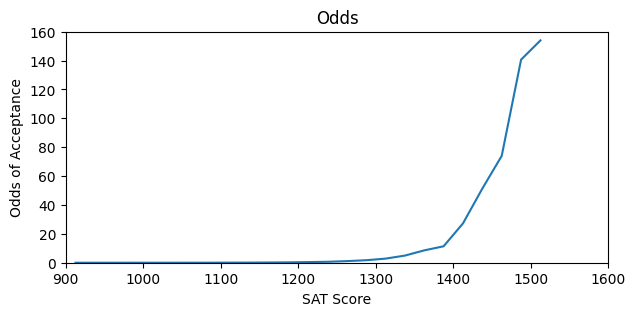

In [242]:
plt.figure(figsize=[7,3])
plt.plot(bin_centers, counts_accepted / counts_rejected)
plt.xlabel('SAT Score')
plt.ylabel('Odds of Acceptance')
plt.xlim(900,1600)
plt.ylim(0,160)
plt.title('Odds')
plt.show()

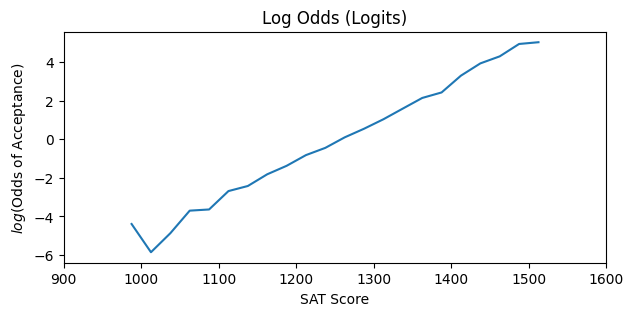

In [243]:
plt.figure(figsize=[7,3])
plt.plot(bin_centers, np.log(counts_accepted / counts_rejected))
plt.xlabel('SAT Score')
plt.ylabel('$log$(Odds of Acceptance)')
plt.xlim(900,1600)
plt.title('Log Odds (Logits)')
plt.show()

WOW! Nice and linear!

IDEA: ***Model this with Linear Regression!***

These log odds are
$$z = \log \frac{p}{1-p}$$

Model $z$ with a linear model
$$z(x) = \beta_0 + \beta_1 x$$

https://www.desmos.com/calculator/2a9xz5acdk

In [10]:
# prompt: interactive widget with two sliders which plots a given function

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def plot_function(b, w):
    plt.figure(figsize=[7,3])

    x = np.linspace(900, 1600, 100)
    z = b + w*x
    plt.plot(x, np.exp(z) / (1 + np.exp(z)), color='k', lw=5, alpha=.7)

    plt.bar(bin_centers, counts_accepted/(counts_rejected+counts_accepted), color='b', width=25)
    plt.bar(bin_centers, counts_rejected/(counts_rejected+counts_accepted), bottom=counts_accepted/(counts_rejected+counts_accepted), color='r', width=25)
    plt.vlines(bins, 0, 1, color='k', lw=1)
    plt.xlim(900,1600)
    plt.xlabel('Sat Score')
    plt.ylabel('Fraction')
    plt.title('Share of points in each bin by class')
    plt.show()

b_slider = widgets.FloatSlider(min=-50, max=50, value=-33, step=.1)
w_slider = widgets.FloatSlider(min=-0.03, max=0.03, value=.03, step=.001, readout_format='.3f')

widgets.interact(plot_function, b=b_slider, w=w_slider);


interactive(children=(FloatSlider(value=-33.0, description='b', max=50.0, min=-50.0), FloatSlider(value=0.03, …

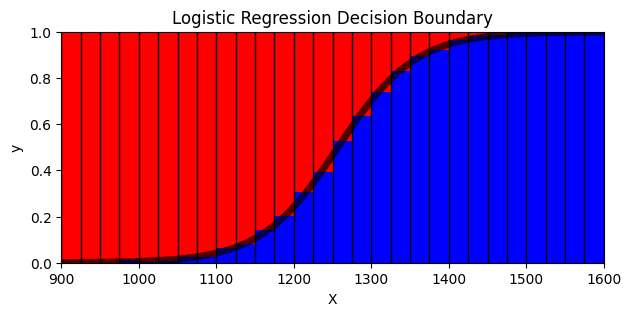

In [8]:
from sklearn.linear_model import LogisticRegression

# ## Fit a logistic regression model
model = LogisticRegression(solver='lbfgs', random_state=0)
model.fit(X.reshape(-1, 1), y)

plt.figure(figsize=[7,3])
plt.bar(bin_centers, counts_accepted/(counts_rejected+counts_accepted), color='b', width=25)
plt.bar(bin_centers, counts_rejected/(counts_rejected+counts_accepted), bottom=counts_accepted/(counts_rejected+counts_accepted), color='r', width=25)
plt.vlines(bins, 0, 1, color='k', lw=1)
plt.xlim(900,1600)

# ## Plot the decision boundary
x_min, x_max = X.min() - .5, X.max() + .5
xx = np.linspace(x_min, x_max, 100)
y_pred = model.predict_proba(xx.reshape(-1, 1))[:, 1]
plt.plot(xx, y_pred, '-k', lw=5, alpha=.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression Decision Boundary')
plt.show()


In [9]:
print(f'b (intercept) = {model.intercept_[0]}')
print(f'w (slope)     = {model.coef_[0]}')

b (intercept) = -25.14714098372327
w (slope)     = [0.020003]


In [11]:
# interpret slope
np.exp(.020003)

1.0202044006353668

<ipython-input-163-97ae41ad7ee5>:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(bin_centers, np.log(counts1 / counts0), label='Binned log-odds')
<ipython-input-163-97ae41ad7ee5>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(bin_centers, np.log(counts1 / counts0), label='Binned log-odds')


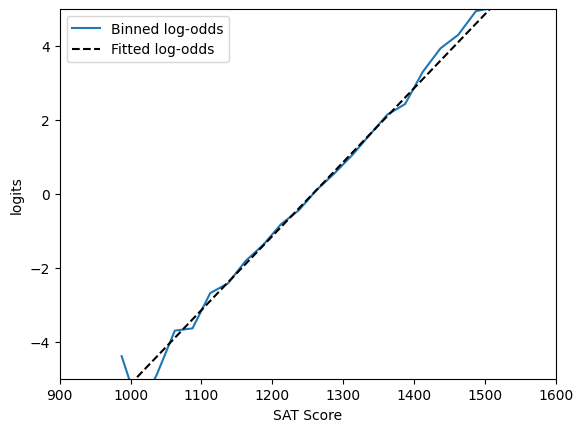

In [163]:
plt.plot(bin_centers, np.log(counts_accepted / counts_rejected), label='Binned log-odds')
plt.plot(xx, np.log(y_pred/(1-y_pred)), color='k', ls='dashed', label='Fitted log-odds')
plt.legend()
plt.xlabel('SAT Score')
plt.ylabel('logits')
plt.axis((900,1600,-5,5))
plt.show()

# Predicting

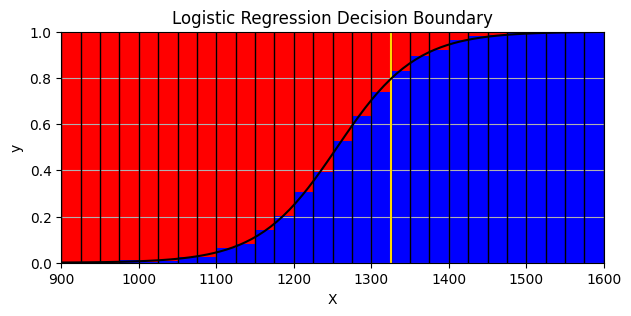

In [279]:
from sklearn.linear_model import LogisticRegression

# ## Fit a logistic regression model
model = LogisticRegression(solver='lbfgs', random_state=0)
model.fit(X_train.reshape(-1, 1), y_train)

plt.figure(figsize=[7,3])
plt.bar(bin_centers, counts_accepted/(counts_rejected+counts_accepted), color='b', width=25)
plt.bar(bin_centers, counts_rejected/(counts_rejected+counts_accepted), bottom=counts_accepted/(counts_rejected+counts_accepted), color='r', width=25)
plt.vlines(bins, 0, 1, color='k', lw=1)
plt.vlines(1325, 0, 1, color='gold')
plt.xlim(900,1600)

# ## Plot the decision boundary
x_min, x_max = X.min() - .5, X.max() + .5
xx = np.linspace(x_min, x_max, 100)
y_pred = model.predict_proba(xx.reshape(-1, 1))[:, 1]
plt.plot(xx, y_pred, '-k')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression Decision Boundary')
plt.grid()
plt.show()

In [280]:
model.predict_proba([[1325]])

array([[0.20484333, 0.79515667]])

In [281]:
thresh = .5
model.predict_proba([[1325]])[0,1] > thresh

True

In [282]:
model.predict([[1325]])

array([1.])

## Evaluating the model performance

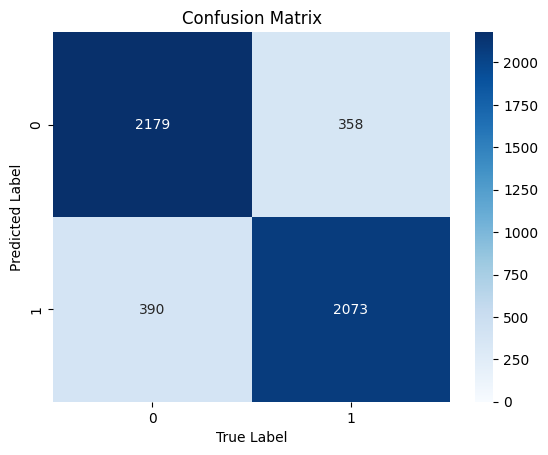

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the labels for the test data
y_pred = model.predict(X_test.reshape(-1, 1))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with seaborn
sns.heatmap(cm.T, annot=True, fmt="d", cmap="Blues", vmin=0)
# NOTE: We transposed the confusion matrix here (cm.T) to reflect conventions in statistics.
# Namely that the vertical axis is the predicted label. By default SKLearn uses the opposite
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Easier values:

# Create the confusion matrix
cm = np.round(confusion_matrix(y_test, y_pred)/50)

# Plot the confusion matrix with seaborn
sns.heatmap(cm.T, annot=True, cmap="Blues", vmin=0)
# NOTE: We transposed the confusion matrix here (cm.T) to reflect conventions in statistics.
# Namely that the vertical axis is the predicted label. By default SKLearn uses the opposite
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

In [303]:
accuracy = (cm[0][0] + cm[1][1]) / cm.sum()
precision = cm[1][1] / (cm[1][1] + cm[0][1])
recall = cm[1][1] / (cm[1][1] + cm[1][0])
f1 = 2 * precision * recall / (precision + recall)
specificity = cm[0][0] / (cm[0][0] + cm[0][1])
false_positive_rate = cm[0][1] / (cm[0][1] + cm[0][0])

print("Accuracy: ---------- {:.3f}".format(accuracy))
print("Precision: --------- {:.3f}".format(precision))
print("Recall: ------------ {:.3f}".format(recall))
print("F1 Score: ---------- {:.3f}".format(f1))
print("Specificity: ------- {:.3f}".format(specificity))
print("False Positive Rate: {:.3f}".format(false_positive_rate))


Accuracy: ---------- 0.850
Precision: --------- 0.837
Recall: ------------ 0.854
F1 Score: ---------- 0.845
Specificity: ------- 0.846
False Positive Rate: 0.154


All of this depends upon our choice of a **threshold!**

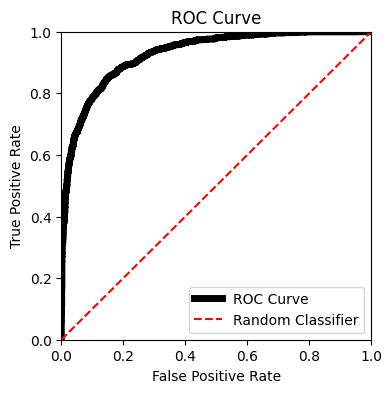

AUC = 0.928


In [310]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.reshape(-1, 1))[:,1])

plt.figure(figsize=[4,4])
plt.plot(fpr, tpr, color='k', lw=5, label='ROC Curve')
plt.plot([0,1],[0,1], color='r', ls='dashed', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.axis([0,1,0,1])
plt.legend()
plt.show()

print(f'AUC = {roc_auc_score(y_test, model.predict_proba(X_test.reshape(-1, 1))[:,1]):.3f}')


# Implementing your own Logistic Regression

In [ ]:
import numpy as np

def sigmoid(z):
    """Compute the sigmoid of z."""

def compute_loss(y, y_pred):
    """Compute the log loss.

    Parameters:
    - y: Actual labels (numpy array)
    - y_pred: Predicted probabilities (numpy array)

    Returns:
    - Log loss
    """

def compute_gradient(X, y, y_pred):
    """Compute the gradient of the loss function with respect to the weights.

    Parameters:
    - X: Input features (numpy array)
    - y: Actual labels (numpy array)
    - y_pred: Predicted probabilities (numpy array)

    Returns:
    - Gradient of the loss function wrt bias and wrt weight
    """

    return grad_bias, grad_weight

def logistic_regression(X, y, num_iterations=1000, learning_rate=0.1):
    """Perform logistic regression using gradient descent.

    Parameters:
    - X: Input features (numpy array)
    - y: Actual labels (numpy array)
    - num_iterations: Number of iterations for the optimization loop
    - learning_rate: Learning rate for the gradient descent

    Returns:
    - weights: Optimized weights (numpy array)
    - bias: Optimized bias term
    """
    # Initialize weights and bias to zeros


    for i in range(num_iterations):
        # Compute the linear combination of weights and features, plus bias


        # Compute the predicted probabilities


        # Compute the gradient of the loss function


        # Update the weights and bias


        # Optionally, print the loss every 100 iterations
        if i % 100 == 0:
            print(f"Loss after iteration {i}: {compute_loss(y, y_pred).squeeze()}")

    return weights, bias

X = X.reshape((-1,1))
weights, bias = logistic_regression(X, y)
# print("Optimized weights:", weights)
# print("Optimized bias:", bias)


Loss after iteration 0: 0.6931471805599454
Loss after iteration 100: 0.4372831990177237
Loss after iteration 200: 0.42285384790441294
Loss after iteration 300: 0.4193042673911556
Loss after iteration 400: 0.41823716620729195
Loss after iteration 500: 0.41788440257919063
Loss after iteration 600: 0.4177617587953929
Loss after iteration 700: 0.41771789264685755
Loss after iteration 800: 0.41770194171870745
Loss after iteration 900: 0.4176960844089964


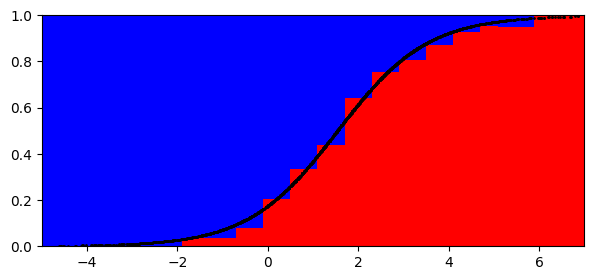

In [ ]:
plt.figure(figsize=[7,3])
plt.bar(bin_centers, counts_accepted/(counts_rejected+counts_accepted), color='r')
plt.bar(bin_centers, counts_rejected/(counts_rejected+counts_accepted), bottom=counts_accepted/(counts_rejected+counts_accepted), color='b')
plt.xlim(-5,7)

# Plot predictions
plt.scatter(X.flatten(), sigmoid(weights * X + bias).flatten(), color='k', s=1)

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape)
print(y.shape)


(569, 30)
(569,)
